In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sys import getsizeof
import random

In [72]:
dataset = np.load("./dataset_win.npy",allow_pickle=True)
print(dataset.shape)

(145, 2)


In [73]:
#Slice dataset into labels and cases
x,y = dataset.T

In [74]:
#Split into train and test datasets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33)


xtrain_norm = []
xtest_norm = []

for i in xtrain:
    i = normalize(i, axis=1, norm='l1')
    xtrain_norm.append(i)
    
for i in xtest:
    i = normalize(i, axis=1, norm='l1')
    xtest_norm.append(i)
    
xtrain_norm = np.array(list(x for x in xtrain_norm))
ytrain = np.array(list(x for x in ytrain))
xtest_norm = np.array(list(x for x in xtest_norm))
ytest = np.array(list(x for x in ytest))
    
print("Size of training dataset: " + str(xtrain_norm.shape))
print("Size of testing dataset:  " + str(xtest_norm.shape))
print("Size of unit class:       " + str(xtest[0].shape))
print("Labels in dataset:        " + str(np.unique(y)))

print(ytrain)
print(ytest)

Size of training dataset: (97, 256, 256)
Size of testing dataset:  (48, 256, 256)
Size of unit class:       (256, 256)
Labels in dataset:        [0 1]
[1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0]
[0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 0 1]


In [75]:
model = Sequential()
model.add(Reshape((256, 256, 1)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(256,256,1), name="conv"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu", name="layer1"))
model.add(layers.Dense(9, activation="softmax", name="layer2"))

In [76]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [77]:
history = model.fit(xtrain_norm, ytrain, batch_size=6, epochs=10)

Epoch 1/10
17/17 [==============================] - 11s 652ms/step - loss: 1.4490 - accuracy: 0.4948
Epoch 2/10
17/17 [==============================] - 11s 644ms/step - loss: 0.3937 - accuracy: 0.8041
Epoch 3/10
17/17 [==============================] - 11s 656ms/step - loss: 0.4535 - accuracy: 0.8660
Epoch 4/10
17/17 [==============================] - 11s 646ms/step - loss: 0.1564 - accuracy: 0.9485
Epoch 5/10
17/17 [==============================] - 11s 652ms/step - loss: 0.1248 - accuracy: 0.9588
Epoch 6/10
17/17 [==============================] - 11s 654ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 11s 652ms/step - loss: 0.1969 - accuracy: 0.9278
Epoch 8/10
17/17 [==============================] - 11s 658ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 9/10
17/17 [==============================] - 11s 649ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 10/10
17/17 [==============================] - 11s 649ms/step - loss: 0.2062 - accura

In [78]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 256, 256, 1)       0         
_________________________________________________________________
conv (Conv2D)                (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 84, 84, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 451584)            0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               57802880  
_________________________________________________________________
layer2 (Dense)               (None, 9)                

In [79]:
model.evaluate(xtest_norm, ytest)

2/2 [==============================] - 0s 206ms/step - loss: 0.4778 - accuracy: 0.8125


[0.47775161266326904, 0.8125]

In [80]:
def get_str(n):
    if n == 0: return "GIF"
    if n == 1: return "PE64"
    if n == 2: return "MP3"
    if n == 3: return "FLAC"
    if n == 4: return "DLL"
    if n == 5: return "HTML"
    if n == 6: return "PDF"
    if n == 7: return "PNG"
    if n == 8: return "XML"


In [81]:
for x in range(len(ytest)):
    p =  model.predict(xtest_norm[x].reshape(1, 256, 256, 1))
    if not ytest[x] == p.argmax(): 
        print(str(x) + "\twas: " + get_str(ytest[x]) + "\tpredicted: " + get_str(p.argmax()))

0	was: GIF	predicted: PE64
20	was: GIF	predicted: PE64
22	was: GIF	predicted: PE64
27	was: PE64	predicted: GIF
28	was: PE64	predicted: GIF
34	was: GIF	predicted: PE64
40	was: GIF	predicted: PE64
42	was: GIF	predicted: PE64
43	was: GIF	predicted: PE64


Prediction: GIF
Actual:     GIF
Confidence Levels: 
gif	 = 0.99999809265136718750
pe64	 = 0.00000187661873951583
mp3	 = 0.00000000000015921406
flac	 = 0.00000000001583124430
dll	 = 0.00000000000077893123
html	 = 0.00000000017629199489
pdf	 = 0.00000000000197200372
png	 = 0.00000000001859568229
xml	 = 0.00000000001345051934


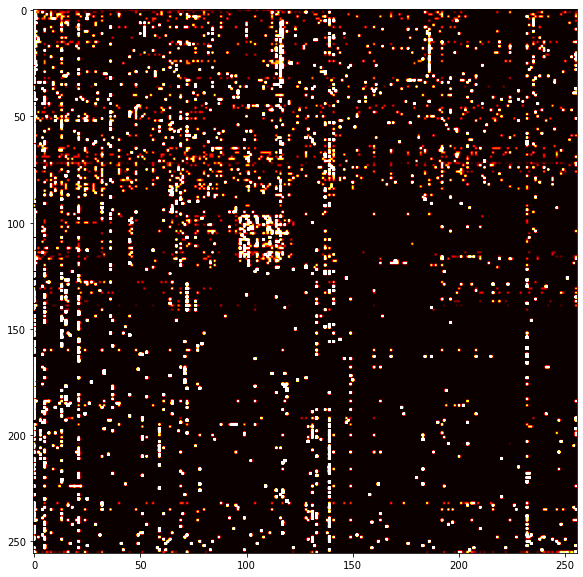

In [86]:
image_index = 25
plt.figure(figsize = (10,10))
plt.imshow(xtest_norm[image_index],cmap='hot',vmax=0.02)
pred = model.predict(xtest_norm[image_index].reshape(1, 256, 256, 1))
print("Prediction: " + get_str(pred.argmax()))
print("Actual:     " + get_str(ytest[image_index]))
print("Confidence Levels: ")
categories = ['gif','pe64','mp3','flac','dll','html','pdf','png','xml']
p =  model.predict(xtest_norm[image_index].reshape(1, 256, 256, 1))

for i in range(len(categories)):
    np.set_printoptions(precision=4)
    print(categories[i] + "\t = " + str('{:.20f}'.format(p[0][i])))